## Assignment 7 — Outlier Detection using IQR & Z-Score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("E:/Engineering/Machine Learning/ADS-VAC/notebooks/datasets/housing.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Select numerical columns

In [3]:
num_df = df.select_dtypes(include=[np.number])
num_df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### IQR METHOD

Outliers = values outside
[ Q1 – 1.5×IQR , Q3 + 1.5×IQR ]

### Compute Outliers using IQR

We will detect outliers for each numeric feature.

In [4]:
def iqr_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers


### Count IQR Outliers for Each Feature

In [5]:
iqr_results = {}

for col in num_df.columns:
    outliers = iqr_outliers(num_df[col])
    iqr_results[col] = len(outliers)

iqr_results


{'id': 0,
 'price': 1146,
 'bedrooms': 546,
 'bathrooms': 571,
 'sqft_living': 572,
 'sqft_lot': 2425,
 'floors': 0,
 'waterfront': 163,
 'view': 2124,
 'condition': 30,
 'grade': 1911,
 'sqft_above': 611,
 'sqft_basement': 496,
 'yr_built': 0,
 'yr_renovated': 914,
 'zipcode': 0,
 'lat': 2,
 'long': 256,
 'sqft_living15': 544,
 'sqft_lot15': 2194}

### Visualize Outliers with Boxplots

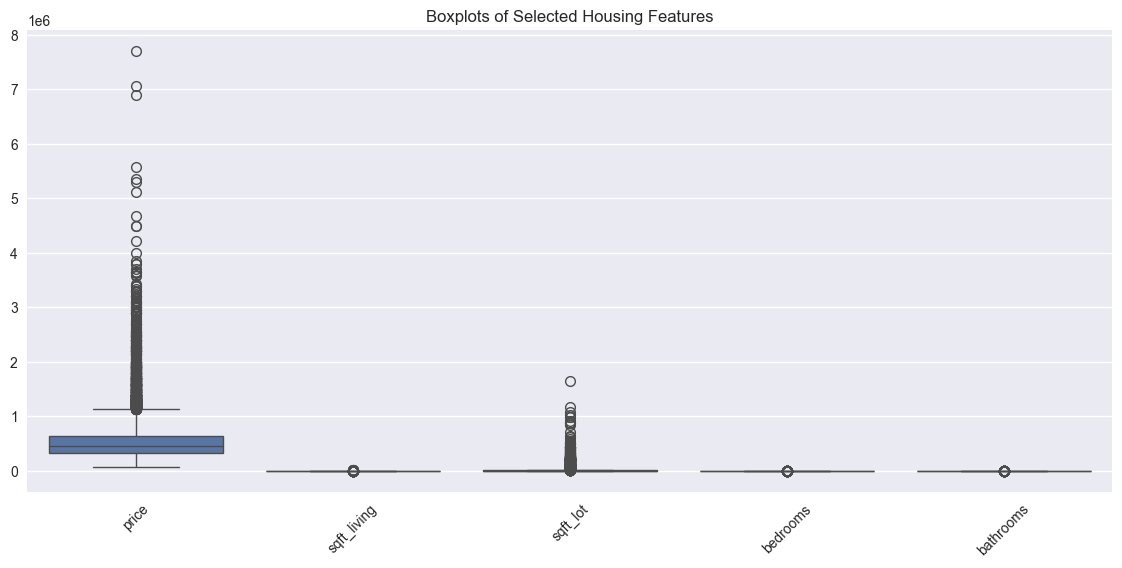

In [6]:
plt.figure(figsize=(14,6))
sns.boxplot(data=num_df[['price','sqft_living','sqft_lot','bedrooms','bathrooms']])
plt.xticks(rotation=45)
plt.title("Boxplots of Selected Housing Features")
plt.show()


### Z-Score METHOD

Compute
z = (x – mean) / std

Outliers: |z| > 3 (common threshold)

In [7]:
from scipy.stats import zscore

z_df = num_df.apply(zscore)

# Consider |z| > 3 as outlier
z_outliers = (np.abs(z_df) > 3)
z_outliers.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Count Z-Score Outliers per Feature

In [8]:
z_results = z_outliers.sum()
z_results


id                 0
price            406
bedrooms          75
bathrooms        187
sqft_living      248
sqft_lot         347
floors             8
waterfront       163
view             829
condition         30
grade            136
sqft_above       254
sqft_basement    247
yr_built           0
yr_renovated     914
zipcode            0
lat                0
long             233
sqft_living15    237
sqft_lot15       363
dtype: int64

### Show Outlier Locations

In [9]:
outlier_indices = np.where(z_outliers)
list(zip(outlier_indices[0][:10], outlier_indices[1][:10]))  # show first 10


[(1, 14),
 (5, 3),
 (5, 4),
 (5, 18),
 (5, 19),
 (10, 12),
 (15, 8),
 (21, 1),
 (21, 8),
 (21, 18)]

### Comparison Summary

In [10]:
comparison_df = pd.DataFrame({
    "Feature": num_df.columns,
    "IQR Outliers": num_df.columns.map(iqr_results),
    "Z-Score Outliers": z_results.values
})

comparison_df


,Feature,IQR Outliers,Z-Score Outliers
0,id,0,0
1,price,1146,406
2,bedrooms,546,75
3,bathrooms,571,187
4,sqft_living,572,248
5,sqft_lot,2425,347
6,floors,0,8
7,waterfront,163,163
8,view,2124,829
9,condition,30,30


### ✔ Outlier Detection Summary
#### IQR Method

Works well for skewed distributions

Uses percentile-based thresholds

Often detects more outliers when data is heavily skewed (like sqft_lot)

#### Z-Score Method

Works best on normally distributed features

Scaled by standard deviation

Underperforms when distribution is highly skewed (e.g., large-lot houses)

##### ✔ Typical Observations (Housing Dataset)

sqft_lot and sqft_lot15 have many extreme values → many IQR outliers

price has fewer Z-score outliers because distribution is wide but smoother

bedrooms rarely exceeds 10, so both methods detect very few outliers

sqft_living and sqft_above show moderate outlier presence